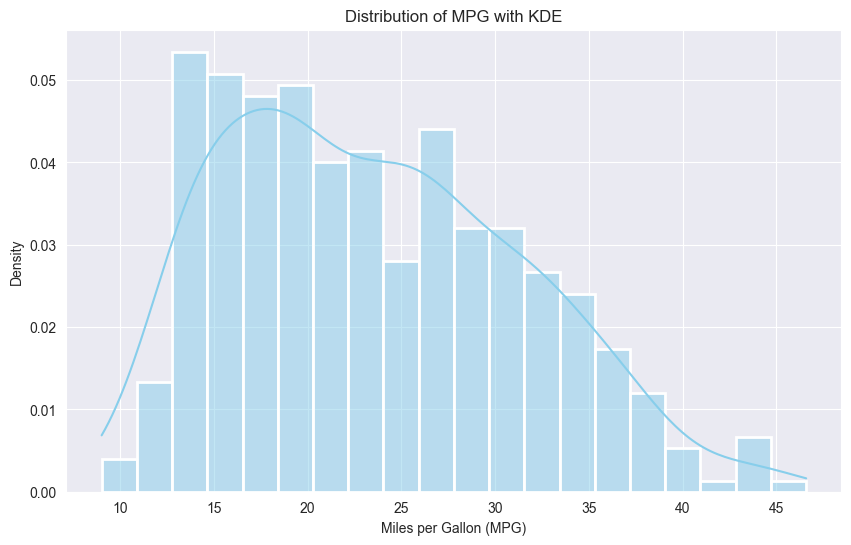

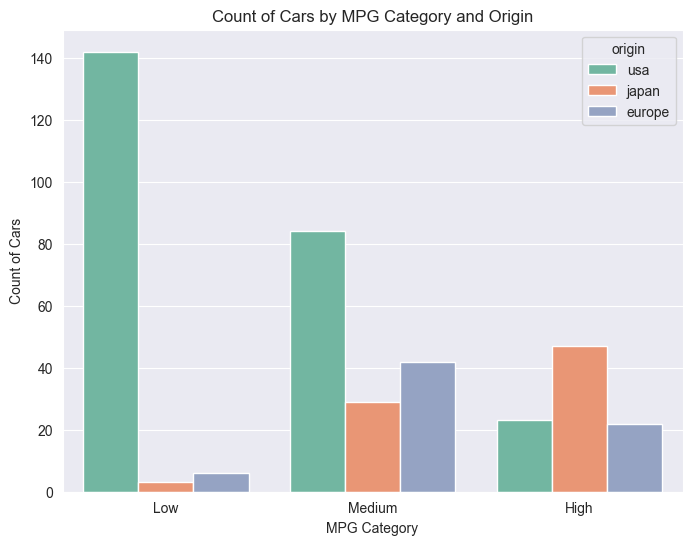

In [36]:
# Seaborn의 mpg(Miles Per Gallon) 데이터셋을 활용하여
# 진행할 수 있는 간단한
#
# 예제 1: 자동차 연비(mpg)의 분포 및 구간별 시각화
#
# 문제 설명
# mpg 데이터셋을 불러옵니다.
# 자동차 연비(mpg)의 전반적인 분포를 히스토그램으로 시각화하고,
# 커널 밀도 곡선(KDE)을 함께 그려보세요.
# 연비를 범주화(예: ‘저연비’, ‘중연비’, ‘고연비’)해서 막대 그래프로 시각화해보고,
# 각 범주에 속하는 자동차가 몇 대인지 확인하세요.
#
# # 1. mpg 데이터셋 불러오기
# mpg = sns.load_dataset("mpg")
# print(mpg.head())
#
#
# # 3. 연비 범주화 (예시 기준: 0~20=저연비, 20~30=중연비, 30이상=고연비)
# def categorize_mpg(x):
# if x < 20:
# return "Low"
# elif x < 30:
# return "Medium"
# else:
# return "High"

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")
# print(mpg.head())  # 필요하면 첫 몇 개 데이터 확인

# 연비 범주화
def categorize_mpg(x):
    if x < 20:
        return "Low"  # 저연비
    elif x < 30:
        return "Medium"  # 중연비
    else:
        return "High"  # 고연비

# 연비 컬럼을 기준으로 'Low', 'Medium', 'High' 범주 생성
mpg['mpg_category'] = mpg['mpg'].apply(categorize_mpg)

# 연비 분포를 히스토그램과 커널 밀도 곡선(KDE)으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(mpg['mpg'], kde=True, bins=20, color='skyblue', stat='density', linewidth=2)
plt.title("Distribution of MPG with KDE")
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Density")
plt.show()

# 연비 범주별 자동차 수를 막대 그래프로 시각화
# 예시: 'origin' 컬럼을 기준으로 색상 구분 (여기서 'origin'은 데이터셋에 존재하는 컬럼)
plt.figure(figsize=(8, 6))
sns.countplot(x='mpg_category', data=mpg, hue='origin', palette='Set2')
plt.title("Count of Cars by MPG Category and Origin")
plt.xlabel("MPG Category")
plt.ylabel("Count of Cars")
plt.show()


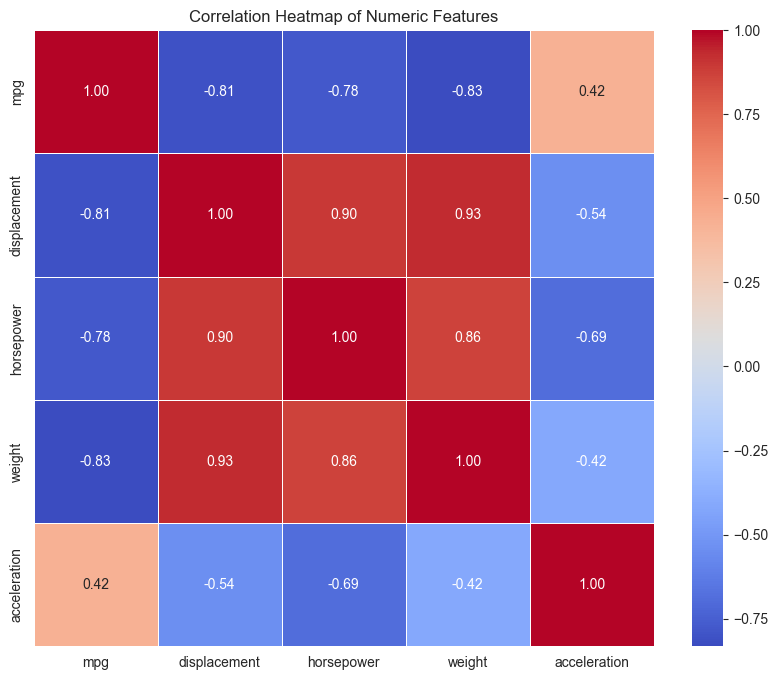

In [37]:
# 예제 2: 숫자형 변수 간 상관관계 분석 (Heatmap)
#
# 문제 설명
# mpg 데이터셋에서 숫자형 열
# (예: mpg, displacement, horsepower, weight, acceleration)만
# 골라서 새로운 데이터프레임을 생성합니다.
# (결측치 제거 : dropna())
#
# 이들 변수 간 상관계수를 구한 뒤, Seaborn의 heatmap으로 시각화해보세요.
# 상관계수를 해석하고, 어떤 변수들이 연비(mpg)와 밀접한 관계가 있는지 논의해보세요.

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")

# 숫자형 변수만 선택
numeric_mpg = mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]

# 결측지 제거
numeric_mpg = numeric_mpg.dropna()

# 상관계수 계산
corr_matrix = numeric_mpg.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 그래프 제목 설정
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.67e-34
Time:                        16:31:30   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

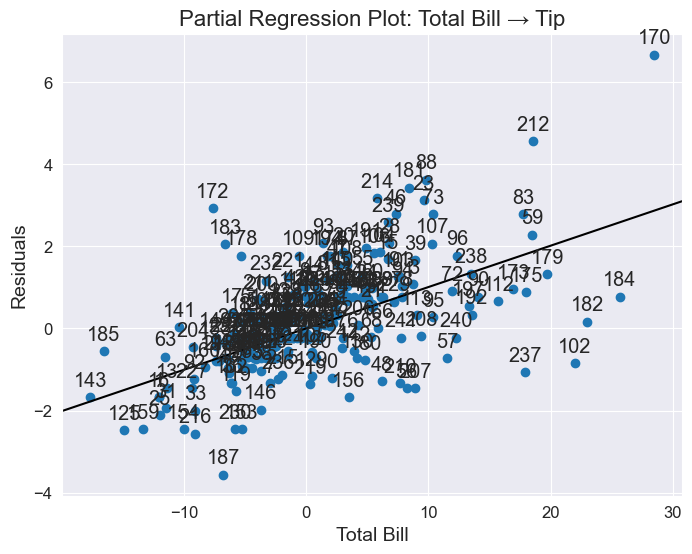

In [38]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot)
# 문제 설명
# 종속 변수를 mpg로 설정하고, 독립 변수로 horsepower, weight를 사용하여
# 선형 회귀 모델을 적합합니다.
# (결측치 제거 : dropna())
# 모델 요약 결과를 확인하고, horsepower가 연비에 미치는 순수한 영향을
# 부분 회귀 플롯으로 시각화하세요.

# 1. 데이터 불러오기
tips = sns.load_dataset("tips")

# 2. 결측치 제거
tips = tips.dropna(subset=['total_bill', 'size', 'tip'])

# 3. 독립 변수(X)와 종속 변수(y) 설정
X = tips[["total_bill", "size"]]  # 독립 변수
y = tips["tip"]  # 종속 변수

# 4. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 5. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 6. 회귀 분석 결과 출력
print(model.summary())

# 7. 부분 회귀 플롯 (total_bill의 순수한 영향력 확인)
fig, ax = plt.subplots(figsize=(8, 6))

# 수정된 부분: exog_i는 'total_bill', exog_others는 'size'로 설정
# 중요한 점은 `plot_partregress`에서 'exog'와 'exog_others'만 전달하고
# 나머지 인자들은 그대로 처리해야 한다는 점입니다.
sm.graphics.plot_partregress(endog=y, exog_i=X['total_bill'], exog_others=X[['size']], data=tips, ax=ax)

# 8. 그래프 제목 설정
plt.title("Partial Regression Plot: Total Bill → Tip", fontsize=16)
plt.xlabel("Total Bill", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 9. 그래프 표시
plt.show()